### 워드클라우드 - 어버이날 선물

In [39]:
import re, nltk
from konlpy.tag import Okt 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

- 한글 텍스트 전처리

In [10]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [11]:
okt = Okt()
tokens = okt.nouns(text) # 문장에서 명사 추출 (그런데 꼭 그렇게 추출되지만은 않다.)
tokens[:10]

['어버이날', '선물', '추천', '탄생석', '골드', '카네이션', '추천', '카네이션', '자체', '전체']

In [12]:
# 영문자, 숫자 제거 
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    # if expretion => bool
    # False 0 ,0.0, '', Nane #  item이 false가 아니면 appen해라
    if item: # item이 빈문자열이 아니면 # 빈문자열이면 False,즉 item에 빈 문자열이 아닌 것만 append
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 문장을 만족할 때 까지 반복

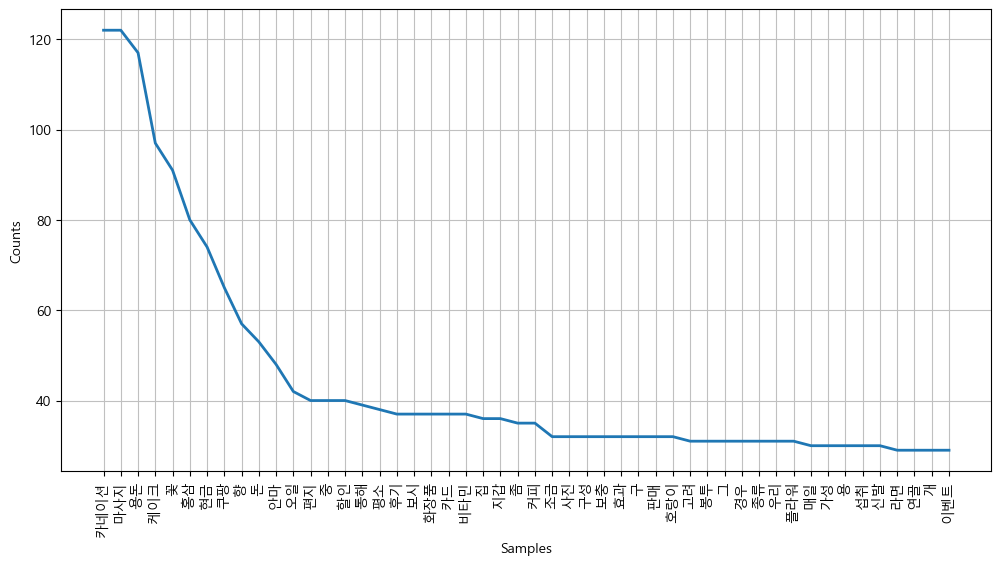

In [28]:
gift = nltk.Text(new_tokens, name='어버이날선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [48]:
stoptext = """ 
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 도움 요 참고 스 사용 활동 
    때 파트너 고민 수수료 위 구매 등 세트 생각 제공 요즘 기 분 상품 박스 정액 한번 마음 이미지
    존재 링크 아래 일환 자체 전체 제작 거 정말 지금 더 포스팅 답변 부담 선택 관리 하나 인기 가지 가장 주문 채택 브랜드
    준비 의미 방향 배송 어머니 저희 날 디자인 시간 건 발 질문 나이 이번 정도 포장 아버지 콘드 이친 일 도금 완전 더욱
    대도 자 선 어깨 무릎 매번 기능 양제 정보 관절 도 꼭 정도 걸 운동 때문 직접 사 제일 피 엄마 번 전 글 제일 다른
    노블 관련 최고 드릴 석고 해 아빠 원적외선 골드 답글 치료 칭찬 일반 적외선 사기 처럼 빛 안나 램프 진 눈 감 나
    평소 후기 보시 좀 조금 구성 사진 효과 구 판매 호랑이 봉투 그 경우 종류 우리 플라워 매일 가성 용 섭취 라면 파장
    달라 매일 통해 침투 생육 쿠팡 중 구 몸속 광선 허리 자주 두
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['탄생석', '카네이션', '카네이션', '금', '카네이션', '탄생석', '세라믹', '사우나', '서로', '사드']

- 워드 클라우드 그리기

In [32]:
data = gift.vocab().most_common(5)
data # list에 tuple로 되어있음

[('카네이션', 122), ('마사지', 122), ('용돈', 117), ('케이크', 97), ('꽃', 91)]

In [ ]:
# generate와 generate_from_frequencies 구분해야함

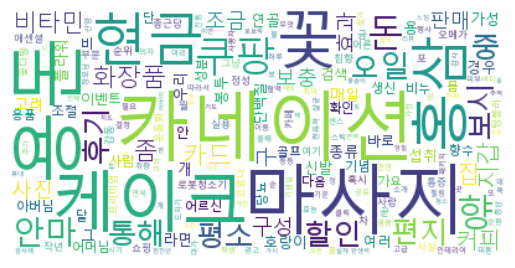

In [45]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='c/windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

# plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

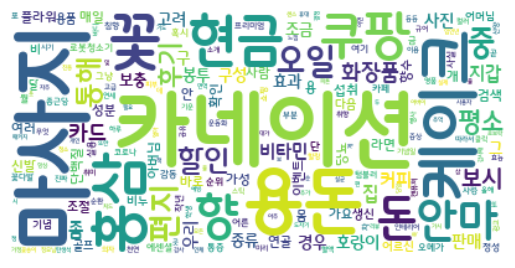

In [38]:
wc =WordCloud(
    background_color='white',random_state=2023,
    font_path='c:/Windows/Fonts/MalangmalangB.ttf'
    # font_path=r'C:\Users\YONSAI\AppData\Local\Microsoft\Windows\Fonts'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

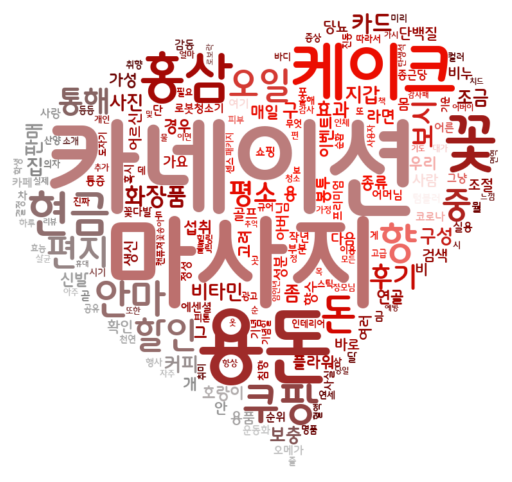

In [43]:
wc =WordCloud(
    background_color='white',random_state=2023,
    relative_scaling=0.2, mask=mask,

    font_path='c:/Windows/Fonts/MalangmalangB.ttf'
    # font_path=r'C:\Users\YONSAI\AppData\Local\Microsoft\Windows\Fonts'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(10,6))
# plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()